Steam Store Games - Data Mining
======
##### Equipe:
- Breno Alef - 474528
- Klayver Paz -
- Nicolas Soares - 399048
------

# Conjunto de Dados Escolhido

Para o desenvolvimento deste trabalho, a equipe decidiu trabalhar com dados sobre os jogos publicados na loja do Steam. Para obtenção dessas informações, foi utilizada a plataforma Kaggle, uma comunidade online de cientistas de dados onde são postados diversos conjuntos para estudo e o escolhido foi o [Steam Store Games (Clean dataset)](https://www.kaggle.com/nikdavis/steam-store-games/data?select=steam.csv).

## Bibliotecas Utilizadas

Ao longo deste trabalho, as seguintes bibliotecas foram utilizadas:
*   __Pandas:__ Leitura dos arquivos .csv com os dados e para a manipulação dos dataframes. Pode ser instalado com o comando `conda install pandas`

*   __Matplotlib:__ Visualização dos dados em gráficos. Pode ser instalado com o comando `conda install -c conda-forge matplotlib`

*   __Seaborn:__ Baseado no matplotlib e utilizado para facilitar a construção de alguns gráficos Pode ser instalado com o comando `conda install seaborn`

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Leitura do Conjunto de Dados

Na página do conjunto, diversos arquivos com dados dos jogos estão disponíveis. Para o prosseguimento deste trabalho, as informações de interesse estão no arquivo **steam.csv**.

In [47]:
games = pd.read_csv("steam.csv", sep=",", engine='python')
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## Pré-processamento dos dados 

Inicialmente, vamos verificar quais são as colunas do dataframe.

In [48]:
print(games.dtypes)

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object


Para que possamos analisar a data de lançamento (release_date), precisaremos converter a coluna do tipo object para um datetime.

In [49]:
games['release_date'] = pd.to_datetime(games['release_date'])

Outra coisa que precisamos verificar é a existência de valores nulos.

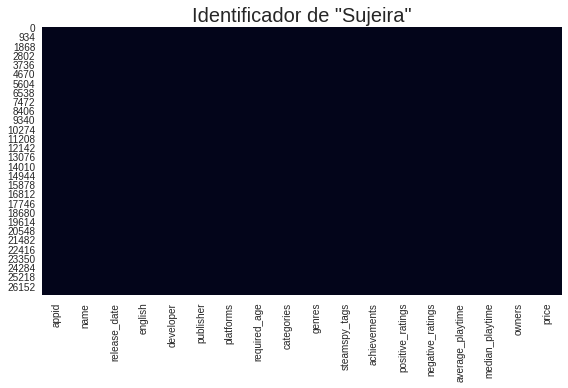

In [55]:
plt.style.use("seaborn")
sns.heatmap(games.isnull(), cbar =  False)
plt.title('Identificador de "Sujeira"',fontsize=20)
plt.tight_layout()
plt.show()

Como o dataset está limpo, podemos prosseguir para as análises.

# Análises
Nesta seção se concentram as análises realizadas nos dados do conjunto.

## Visão Geral
Iniciamos a análise com uma visão geral sobre as entradas do dataset.

### Datas
Quando se trata de uma loja online como a do Steam, uma informação interessante de se obter é analisar quando os jogos foram lançados. 

#### Lançamentos por mês
Podemos iniciar verificando se há alguma diferença significativa em relação ao mês do ano do lançamento.

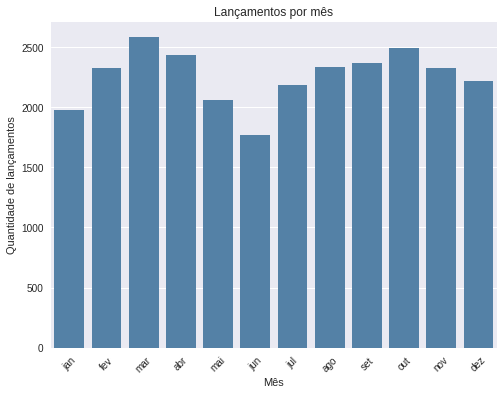

In [32]:
by_month = games.groupby(games.release_date.dt.month.rename('release_month'))\
    .agg('count').appid.rename('count')

months = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

plt.figure(figsize=(8,6))

g = sns.barplot(x=by_month.index, y=by_month, color="SteelBlue")
g.set_xticklabels(months)
plt.xticks(rotation=45)
plt.title('Lançamentos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de lançamentos')
plt.show()

Olhando para o gráfico que exibe a quantidade total de lançamentos po mês, pode-se observar que o mês mais forte no geral foi fevereiro e o mais fraco foi junho. Apesar do período de férias no meio do ano, não se observa um pico muito grande de lançamentos nesse período, apresentando uma queda notável em relação aos demais meses. A maior concentração tende para o meio dos semestres. 

#### Lançamentos por ano
Além dos meses, podemos verificar também os anos de lançamento e verificar a variação ao longo do tempo.

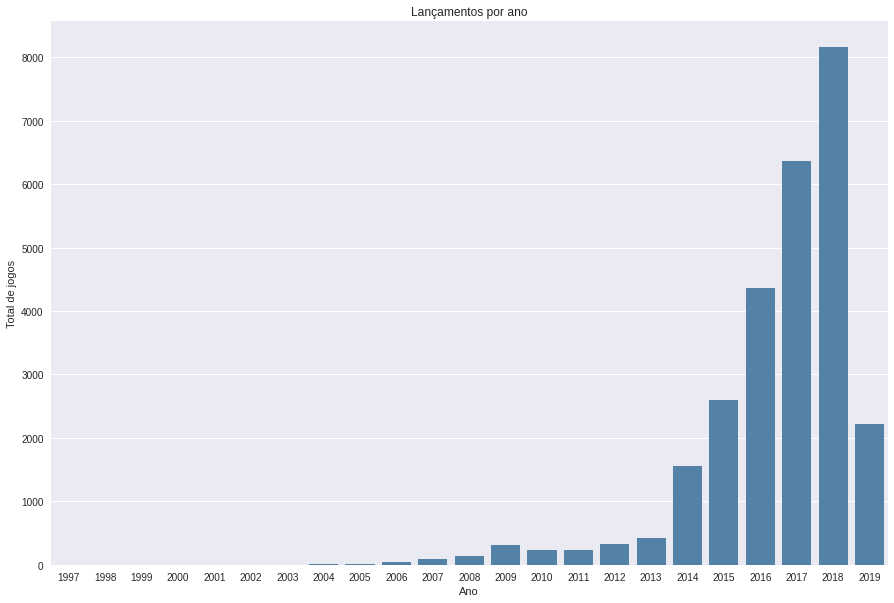

In [56]:
by_year = games.groupby(games.release_date.dt.year.rename('release_year'))\
    .agg('count').appid.rename('count')

plt.figure(figsize=(15,10))

sns.barplot(y=by_year, x=by_year.index, color='SteelBlue')
plt.title('Lançamentos por ano')
plt.xlabel('Ano')
plt.ylabel('Total de jogos')
plt.show()

Analisando o gráfico, percebe-se que inicia com valores baixos até que passa a crescer exponencialmente após 2012. Olhando para a história da plataforma, isso se explica pelo fato de que, até o lançamento do Steam Greelight em 2012, o Steam publicava apenas jogos da Valve, de grandes empresas ou de parceiras. A mudança possibilitou que desenvolvedores menores pudessem submeter seus jogos para serem submetidos a uma votação de escolha das novas adições à loja. O crescimento é exibido até o ano de 2019, onde a quantidade de registros no conjunto de dados é limitada devido ao momento de sua obtenção.

### Suporte à língua inglesa
Uma das informações que o conjunto de dados traz é a do suporte para inglês. Apesar de ser uma plataforma internacional, o Steam não possui qualquer limitação que obrigue o publicante a traduzir o seu jogo para um idioma específico. Considerando isso, podemos nos perguntar qual a cobertura da língua inglesa no catálogo.

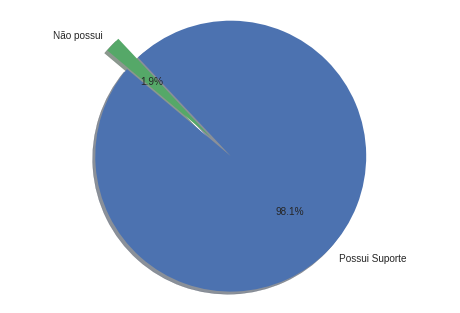

In [57]:
labels = ['Possui Suporte', 'Não possui']
sizes = games.english.value_counts()
explode = (0, 0.2)

plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Como esperado de uma loja disponível em diversos países pelo mundo, a maioria dos jogos do catálogo possui suporte para a língua inglesa, com apenas 1.9% deficientes de uma tradução para essa língua franca.

### Classificação Indicativa
Uma coisa que podemos verificar é a distribuição das classificações indicatívas na loja, analisando a quantidade de jogos restritos ou livres para todas as idades. Isso pode nos dar uma ideia de quão amigáveis para toda a família ou explícitos são considerados os jogos publicados no Steam.

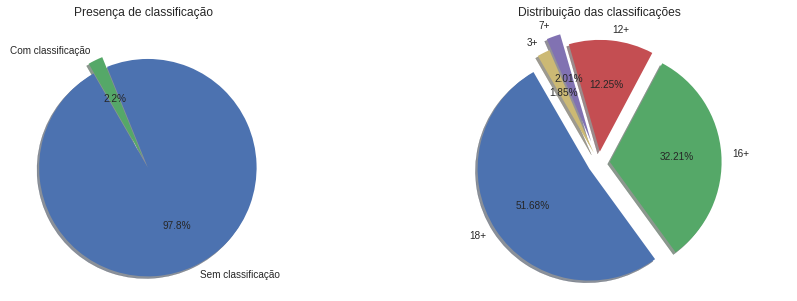

In [58]:
# valores únicos: [ 0 18 16 12  7  3], onde 0 indica que o jogo é livre ou não foi classificado
age = games.required_age.value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

labels = ['Sem classificação', 'Com classificação']
values = age[0], sum(age[1:])
ax1.pie(values, explode=(0.1, 0), labels = labels, autopct = '%1.1f%%', shadow=True, startangle=120)
ax1.title.set_text('Presença de classificação')


labels = ['18+', '16+', '12+', '7+', '3+']
values = age[1:]
ax2.pie(values, explode=(0.1, 0.1, 0.1, 0.2, 0.1), labels = labels, autopct = '%1.2f%%', shadow=True, startangle=120)
ax2.title.set_text('Distribuição das classificações')

plt.axis('equal')
plt.show()

Da distribuição dos dados, pode-se observar que a maioria das entradas (97.8%) encontra-se sem limitação de idade. Já considerando os jogos com classificiação, vemos que mais da metade dos jogos (51.68%) possui uma limitação bem restrita de idade (18+). Isso indica uma forte predominância nas entradas classificados de jogos considerados bastante violentos ou com temática e linguagem inapropriadas mais extremas segundo o padrão do sistema europeu de classificação (PEGI).

### Generos
A próxima análise que podemos fazer se refere aos gêneros mais presentes na loja. Afinal, qual é o gênero mais presente no catálogo? 

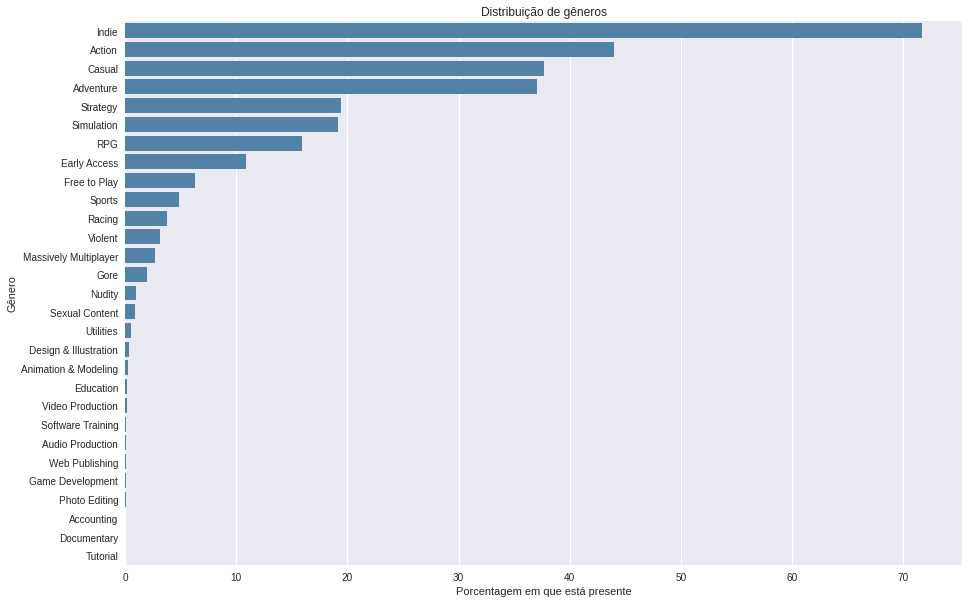

In [59]:
genre_counts = games['genres'].str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=genre_counts.index, x=genre_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição de gêneros')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Gênero')
plt.show()

Do gráfico acima observamos uma presença bastante acentuada do gênero Indie, estando presente em mais de 70% do catálogo da loja e mostrando uma forte presença de pequenos desenvolvedores na loja. Isso explica a grande quantidade de jogos sem uma classificação indicativa como observado no tópico anterior, afinal por serem jogos menores, de pequenos grupos, nem todos foram classificados.  
Após o gênero Indie, os próximos são Ação, Casual e Aventura, indicando uma concentração do esforço dos desenvolvedores e gêneros mais consagrados e abrangentes em relação a público. Um destaque interessante é o gênero de Simulação, que está a frente de gêneros conhecidos como Esportes, Corrida e até mesmo RPG.  
Essa análise, entretanto, considera todos os jogos, independente de classificação indicativa. Como fica então a distribuição de gênero para jogos mais restritos devido ao conteúdo?

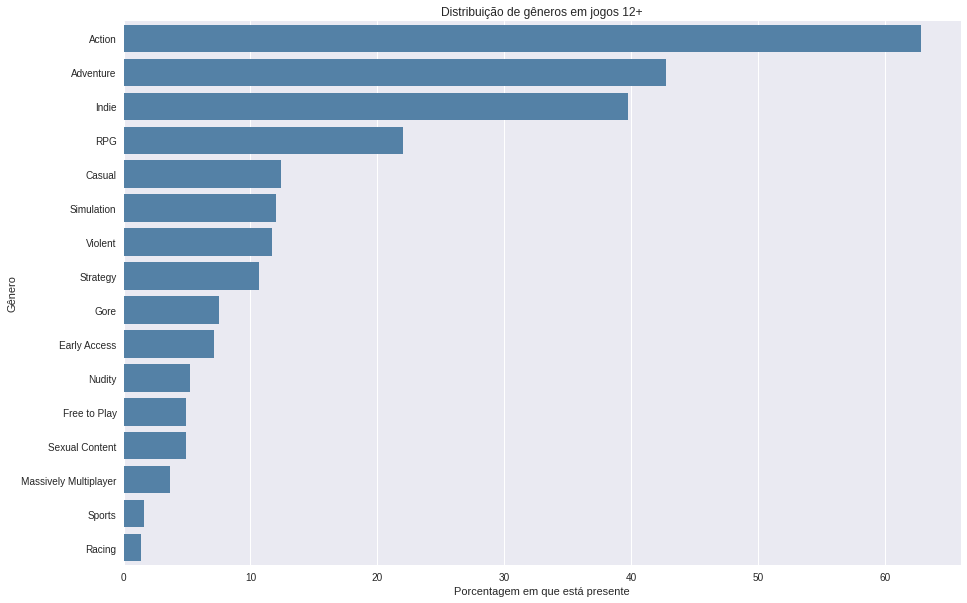

In [37]:
genre_counts = games[games.required_age >= 12].genres.str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=genre_counts.index, x=genre_counts/len(games[games.required_age >= 12])*100, color='SteelBlue')
plt.title('Distribuição de gêneros em jogos 12+')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Gênero')
plt.show()

Confirmando a hipótese anterior, o gênero Indie perde a liderança quando consideramos os jogos que receberam uma classificação indicativa. Nesse subconjunto a liderança pertence ao gênero Ação, seguido de Aventura, com Indie sobrando para terceiro, estando presente em 40% dos jogos.  
Uma coisa interessante a se notar é que, apesar da classificação mais restrita, o gênero Violência representa pouco mais que 10% do catálogo. Com isso podemos inferir que, apesar de serem mais restritos pela presença de violência, isso não é um foco nesses jogos. 

### Categorias
Outra pergunta que podemos nos fazer em relação ao catálogo é quais são os gêneros predominantes na loja.

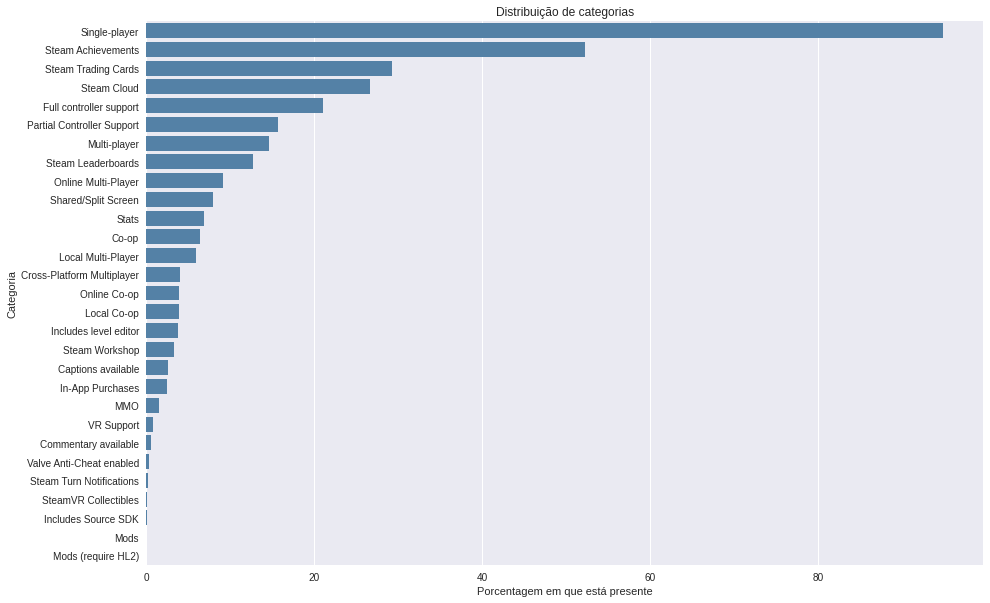

In [60]:
category_counts = games['categories'].str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=category_counts.index, x=category_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição de categorias')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Categoria')
plt.show()

Observando o gráfico acima, podemos verificar que a grande maioria dos jogos disponíveis possuem um modo para apenas um jogador (single-player), o que é entendível, uma vez que o gênero predominante no catálogo é de jogos Indies, que costumam ser focados em uma jogabilidade solo e local. Em seguida, as categorias predominantes são referentes a funcionalidades do Steam, sendo elas as conquistas (Steam Achievements), as cartas (Steam trading Cards) e o armazenamento em nuvem da plataforma (Steam Cloud), o que também é esperado.  
As próximas grandes categorias se referem ao suporte de controle e só então o multiplayer aparece, estando presente em menos de 20% do catálogo. 

### Plataformas
Desde 2013, quando lançou um cliente Steam para Linux, a Valve decidiu investir mais no suporte e no aumento do catálogo para sistemas operacionais da família. Mas afinal como é realmente o suporte para os sitemas operacionais fora da família das janelas?

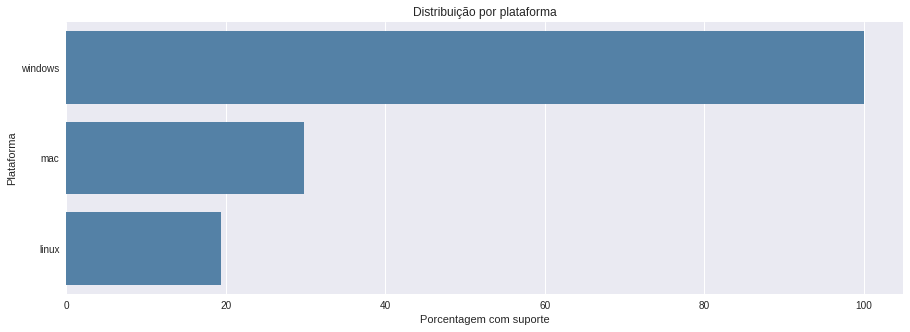

In [61]:
platform_counts = games.platforms.str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,5))
ax = sns.barplot(y=platform_counts.index, x=platform_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição por plataforma')
plt.xlabel('Porcentagem com suporte')
plt.ylabel('Plataforma')
plt.show()

Com aproximadamente 20% do catálogo com suporte para Linux, os sitemas operacionais do pinguim ainda possuem pouca cobertura nativa do catálogo, estando próximo dos cerca de 30% do Mac, mas ainda longe dos quase 100% do Windows. Graças ao Proton desenvolvido pela Valve, entretanto, os jogadores que utilizam Linux podem acessar boa parte do catálogo que não foi disponibilizado pelos desenvolvedores.  
Mas os desenvolvedores não estão adicionando suporte nos novos lançamentos? Como anda a variedade de plataformas dos jogos ao longo do tempo?

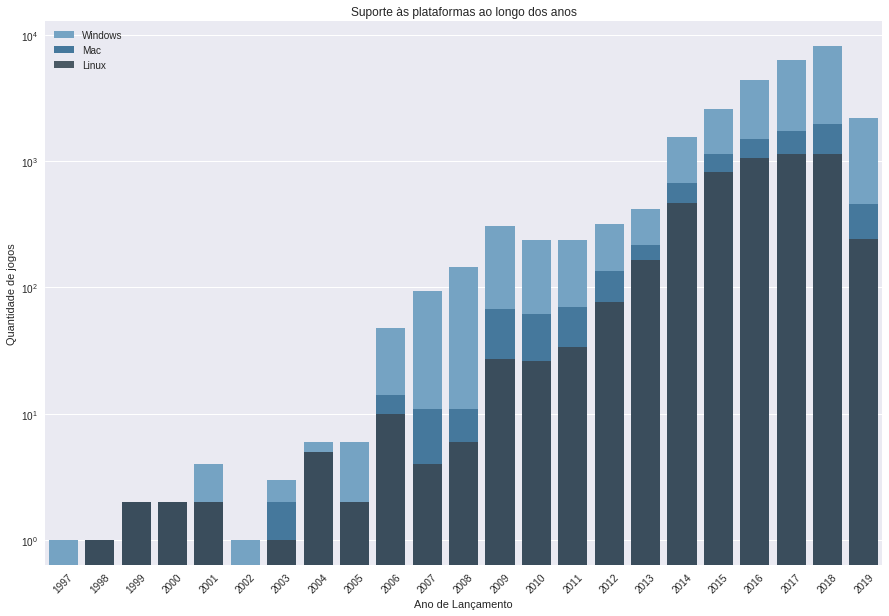

In [62]:
platform_by_year = games.groupby(games.release_date.dt.year.rename('release_year')).agg(
    total=pd.NamedAgg(
        column='platforms',
        aggfunc='count'),
    num_win=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('windows'))),
    num_mac=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('mac'))),
    num_lin=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('linux')))
)

plt.figure(figsize=(15,10))

g = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_win, color='#68a6d0', label='Windows')
g3 = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_mac, color='#367aab', label='Mac')
g2 = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_lin, color='#344a5a', alpha=0.9, label='Linux')
g.set_yscale('log')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel("Quantidade de jogos")
plt.title('Suporte às plataformas ao longo dos anos')

plt.show()

Observando o gráfico acima, podemos notar o crescimento do suporte às outras plataformas que não o Windows resultante da iniciativa da Valve para atender também os usuários de sistemas operacionais diferentes. Além dos jogos antigos que receberam ports, verificamos também que uma parte considerável dos novos jogos já apresenta suporte para Linux e Mac.

### Desenvolvedoras e Publicadoras
Iniciamos verificando as desenvolvedoras com mais jogos publicados na loja.

<AxesSubplot:title={'center':'Top 30 desenvolvedoras com mais jogos'}, xlabel='count', ylabel='developer'>

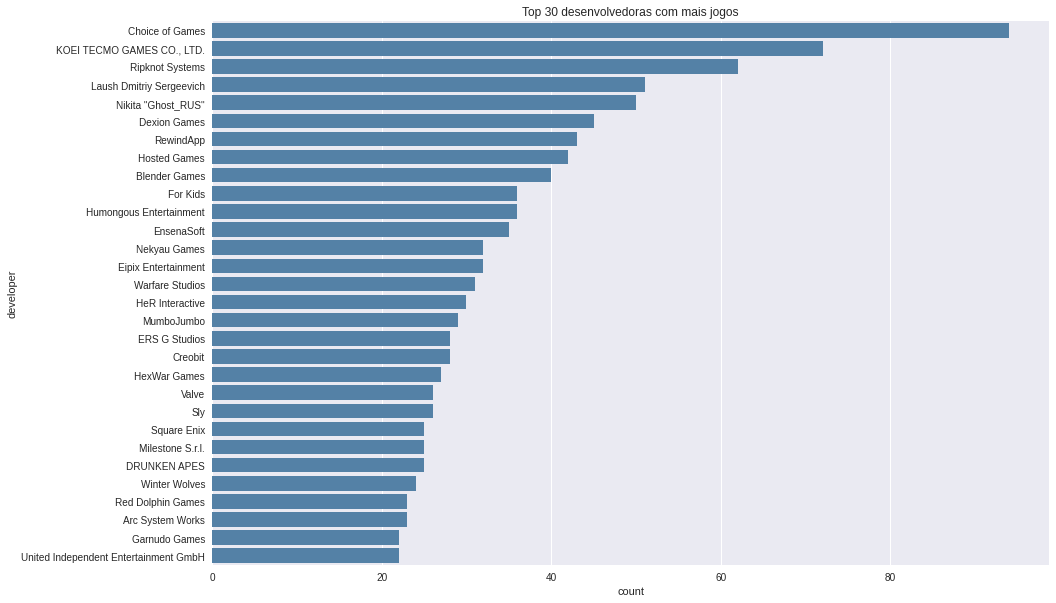

In [91]:
plt.figure(figsize=(15,10))
plt.title('Top 30 desenvolvedoras com mais jogos')

sns.countplot(y='developer', data=games,
             order=games.developer.value_counts().iloc[:30].index,
             color='SteelBlue')

In [152]:
agg_developers = games.groupby('developer')\
        .agg({'name':'count', 'price':'mean'})

agg_developers\
    [agg_developers.index.isin(games.developer.value_counts().iloc[:30].index)]\
    .sort_values(by='name', ascending=False)



,name,price
developer,,
Choice of Games,94,3.851702
"KOEI TECMO GAMES CO., LTD.",72,28.014028
Ripknot Systems,62,8.699677
Laush Dmitriy Sergeevich,51,1.819412
"Nikita ""Ghost_RUS""",50,1.174000
Dexion Games,45,0.885556
RewindApp,43,0.959767
Hosted Games,42,3.285238
Blender Games,40,0.790000


Vemos que a maioria das desenvolvedoras com muitos jogos publica com um preço médio bem baixo.  
A seguir podemos analisar as publicadoras.

<AxesSubplot:title={'center':'Top 30 publicadoras com mais jogos'}, xlabel='count', ylabel='publisher'>

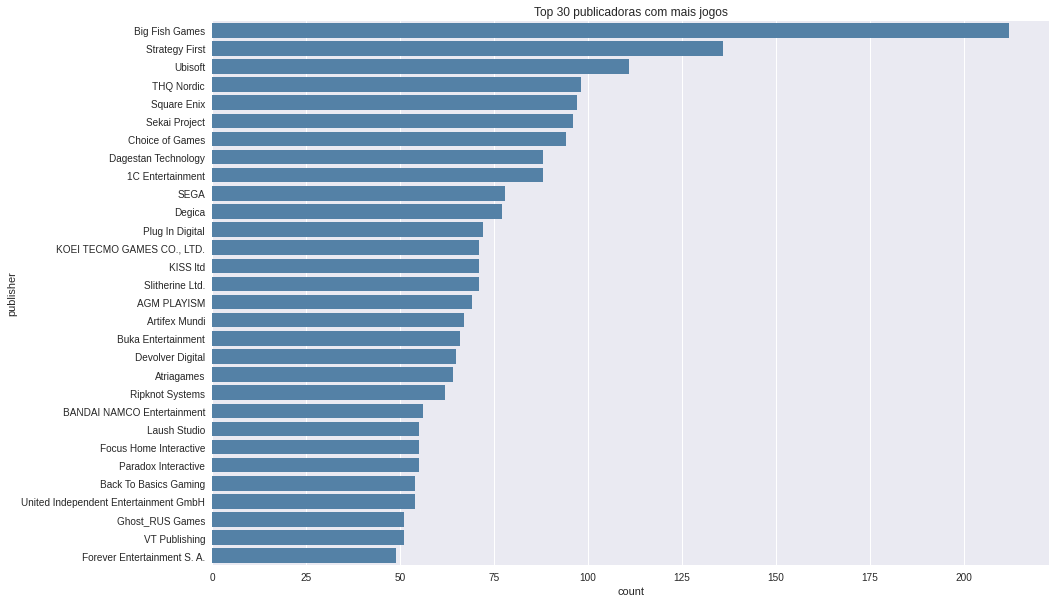

In [129]:
plt.figure(figsize=(15,10))
plt.title('Top 30 publicadoras com mais jogos')

sns.countplot(y='publisher', data=games,
             order=games.publisher.value_counts().iloc[:30].index,
             color='SteelBlue')

In [151]:
publishers = games.groupby('publisher')\
        .agg({'name':'count', 'price':'mean'})
publishers\
    [publishers.index.isin(games.publisher.value_counts().iloc[:50].index)]\
    .sort_values(by='name', ascending=False)

,name,price
publisher,,
Big Fish Games,212,6.828679
Strategy First,136,7.637868
Ubisoft,111,16.480450
THQ Nordic,98,12.850306
Square Enix,97,12.198969
Sekai Project,96,9.824063
Choice of Games,94,3.851702
Dagestan Technology,88,2.697955
1C Entertainment,88,6.192500


Quando olhamos para as publicadoras, há um aumento notável do preço médio.

## Estudo sobre a Ubisoft

Após a visão geral, podemos analisar também os jogos de uma empresa específica. Para essa parte, escolhemos a empresa Ubisoft.

In [100]:
ubi = games[games["publisher"] == "Ubisoft"]
ubi.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
44,2100,Dark Messiah of Might & Magic,2006-10-25,1,Arkane Studios,Ubisoft,windows,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action;RPG,RPG;Action;First-Person,0,4386,316,634,700,1000000-2000000,4.29
60,2450,Bloody Good Time,2010-10-29,1,Outerlight Ltd.,Ubisoft,windows,0,Single-player;Multi-player;Steam Achievements,Action,Action;Multiplayer;FPS,12,662,204,193,193,100000-200000,4.29
184,7200,Trackmania United Forever Star Edition,2008-04-16,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Includes level editor,Racing,Racing;Multiplayer;Level Editor,0,963,55,4774,4774,100000-200000,25.99
268,11020,TrackMania Nations Forever,2008-04-16,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Includes level editor,Racing,Racing;Free to Play;Multiplayer,0,8252,1244,902,87,2000000-5000000,0.00
334,13500,Prince of Persia: Warrior Within™,2009-08-27,1,Ubisoft,Ubisoft,windows,0,Single-player,Action;Adventure,Action;Adventure;Parkour,0,657,101,307,312,200000-500000,8.59


### Plataformas mais utilizadas

<AxesSubplot:xlabel='platforms', ylabel='count'>

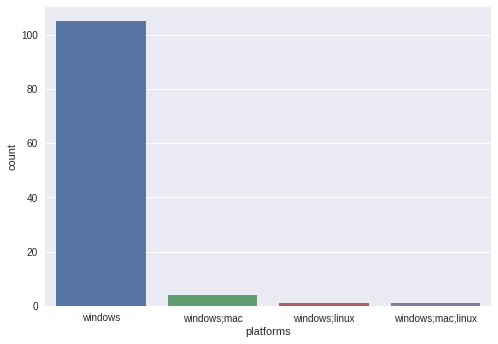

In [68]:
sns.countplot(ubi.platforms)

### 15 games mais caros

In [158]:
ubi.nlargest(15, "price").head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
8251,447040,Watch_Dogs® 2,2016-11-28,1,Ubisoft,Ubisoft,windows,0,Single-player;Co-op;In-App Purchases;Partial C...,Action;Adventure,Illuminati;Open World;Hacking,0,20905,5366,1231,1342,500000-1000000,49.99
9494,488790,South Park™: The Fractured But Whole™,2017-10-16,1,Ubisoft San Francisco,Ubisoft,windows,18,Single-player;Steam Achievements;Steam Trading...,Sexual Content;Nudity;Violent;Gore;RPG,RPG;Comedy;Dark Humor,35,4840,2017,932,976,200000-500000,49.99
11868,552520,Far Cry® 5,2018-03-26,1,Ubisoft Montreal;Red Storm;Ubisoft Shanghai;Ub...,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action;Adventure,Open World;Action;FPS,0,23373,11081,1869,1694,500000-1000000,49.99
12968,582160,Assassin's Creed® Origins,2017-10-26,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;RPG,Open World;Assassin;Action,67,31644,6007,2908,3143,1000000-2000000,49.99
14890,646910,The Crew™ 2,2018-06-28,1,Ivory Tower,Ubisoft,windows,0,Single-player;Online Multi-Player;MMO;Online C...,Action;Massively Multiplayer;Racing,Racing;Open World;Driving,34,4030,3916,2029,1685,200000-500000,49.99


In [70]:
ubi.nlargest(15, "price").price.describe()

count    15.000000
mean     42.790000
std       6.794956
min      33.990000
25%      35.990000
50%      41.990000
75%      49.990000
max      49.990000
Name: price, dtype: float64

In [157]:
ubi.nlargest(15, "median_playtime").head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1659,232910,TrackMania² Stadium,2013-06-20,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;VR Support;Steam Wo...,Racing;Sports,Racing;Multiplayer;Level Editor,0,2915,571,6516,9562,500000-1000000,8.59
5878,375900,Trackmania® Turbo,2016-03-24,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Shared/Split Screen...,Massively Multiplayer;Racing,Racing;Level Editor;Arcade,0,742,441,8159,8159,50000-100000,33.99
1512,221680,Rocksmith® 2014 Edition - Remastered,2016-10-04,1,Ubisoft - San Francisco,Ubisoft,windows;mac,0,Single-player;Shared/Split Screen;Steam Achiev...,Casual;Simulation,Music;Education;Simulation,47,8228,789,6704,7089,500000-1000000,25.99
357,15370,Heroes of Might & Magic V: Tribes of the East,2008-10-10,1,Nival,Ubisoft,windows,0,Single-player,Strategy,Strategy;Turn-Based Strategy;Turn-Based,0,759,66,6679,6679,200000-500000,8.59
1616,228760,TrackMania² Canyon,2013-02-27,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;VR Support;Steam Wo...,Racing;Sports,Racing;Multiplayer;Level Editor,0,1065,259,3793,5675,100000-200000,16.99


In [72]:
ubi.nlargest(15, "median_playtime").price.describe()

count    15.000000
mean     26.843333
std      14.193453
min       8.590000
25%      16.990000
50%      25.990000
75%      35.990000
max      49.990000
Name: price, dtype: float64

### Vendas

In [76]:
ubi.owners.unique()

array(['1000000-2000000', '100000-200000', '2000000-5000000',
       '200000-500000', '500000-1000000', '20000-50000', '0-20000',
       '50000-100000', '10000000-20000000', '5000000-10000000'],
      dtype=object)

In [78]:
ubi[ubi["owners"] == "5000000-10000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
5235,359550,Tom Clancy's Rainbow Six® Siege,2015,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action,FPS;Multiplayer;Tactical,0,251178,59620,7504,2543,5000000-10000000,16.99


In [79]:
ubi[ubi["owners"] == "10000000-20000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2952,291550,Brawlhalla,2017,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.0


In [80]:
ubi[ubi["owners"] == "10000000-20000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2952,291550,Brawlhalla,2017,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.0


In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(ubi.price, ubi.positive_ratings, color = "blue")
sns.scatterplot(ubi.price, ubi.negative_ratings, color = "red")


# Conclusões

Com esse trabalho, podemos obter variadas informações acerca do catálogo da loja do Steam, apesar das limitações de atualização dos dados. Pode-se verificar, por exemplo, que o catálogo é composto principalmente de jogos do gênero Indie, que explica a ausência de classificações indicativas na maioria dos jogos.  
Além disso, analisando as categorias, pudemos verificar que o catálogo é voltado principalmente para modalidade de apenas um jogador, sendo essa a categoria mais presente na loja.  
Como um possível trabalho futuro, é interessante analisar o crescimento dos gêneros na loja a partir do tempo e ver a relação delas com a maior presença de 